<a href="https://colab.research.google.com/github/evarahma61/Sentiment-Analysis-Twitter/blob/main/SVM%20(Labelling%20InSet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dataset

In [ ]:
# impor libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import string
import re
import nltk
import numpy as np

In [ ]:
#upload dataset
from google.colab import files
data_files1 = files.upload()

In [ ]:
dataset_label = pd.read_csv('labeled_sesungguhnya.csv', encoding = "ISO-8859-1")

In [ ]:
dataset_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3105 non-null   object
dtypes: object(1)
memory usage: 24.4+ KB


In [ ]:
dataset_label

,content
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m..."
...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...


##1. Preprocessing : Cleaning Text


In [ ]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
  text = re.sub(r"http\S+", "", text) # menghilangkan URL gambar
  text = re.sub('@[^\s]+','',text) # menghilangkan mention username dalam tweets
  text = re.sub("@[A-Za-z0-9]+","",text) #menghilangkan angka
  text = re.sub('[^A-Za-z]+', ' ', text) #menghilangkan simbol dan karakter spesial yang bukan
  return text
# Cleaning the text in the review column
dataset_label['cleaning'] = dataset_label['content'].apply(clean) #membuat kolom baru yang bernama 


In [ ]:
dataset_label

,content,cleaning
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...
...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...


##2. Preprocessing : Case Folding

In [ ]:
def case_folding(text): # Removes all special characters and numericals leaving the alphabets
  text = text.lower() #lowercase) #mengubah ke lowercase semua
  return text
# Cleaning the text in the review column
dataset_label['case_folding'] = dataset_label['cleaning'].apply(case_folding) 
# membuat kolom baru yang bernama case_folding

In [ ]:
dataset_label

,content,cleaning,case_folding
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...
...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...


##3. Preprocessing : Tokenization

In [ ]:
!pip install nltk

In [ ]:
#import library nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#fungsi buat apply tokenization
def tokenization(text):
  text = word_tokenize(text)
  return text
dataset_label['tokenization'] = dataset_label['case_folding'].apply(tokenization) 

In [ ]:
dataset_label


,content,cleaning,case_folding,tokenization
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga..."
...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me..."


##4. Preprocessing : Normalization

###Upload kamus

In [ ]:
#kamus normalisasi
from google.colab import files
kamus = files.upload()

Saving kamus.xlsx to kamus.xlsx


In [ ]:
#membaca file excel kamus
import pandas as pd
slang = pd.read_excel('kamus.xlsx')

In [ ]:
#apply all normalization corpus in document by dictionaries
normalisasi = {}

for index, row in slang.iterrows():
  if row[0] not in normalisasi:
    normalisasi[row[0]] = row[1]


def normalized_term(document):
    return [normalisasi[term] if term in normalisasi else term for term in document]

dataset_label['normalization'] = dataset_label['tokenization'].apply(normalized_term)

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga..."
...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me..."


##5. Preprocessing : Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [ ]:
print(set(stopwords.words('indonesian')))

{'jadilah', 'memungkinkan', 'secukupnya', 'wong', 'beginikah', 'pentingnya', 'sangatlah', 'menyampaikan', 'hanya', 'sekitarnya', 'mulai', 'terdapat', 'berapakah', 'sekadar', 'terjadinya', 'memperbuat', 'kalau', 'sempat', 'mengucapkannya', 'awalnya', 'menyeluruh', 'tidakkah', 'kapanpun', 'betul', 'kiranya', 'dijelaskan', 'ia', 'menjawab', 'seolah-olah', 'kesampaian', 'menggunakan', 'asalkan', 'macam', 'meskipun', 'kamu', 'mendatang', 'akhir', 'tanyanya', 'jadi', 'baik', 'tapi', 'depan', 'yakni', 'ataukah', 'berkehendak', 'mulailah', 'penting', 'turut', 'dimulailah', 'pasti', 'waktunya', 'mengibaratkannya', 'saatnya', 'tutur', 'seingat', 'masalahnya', 'terbanyak', 'biasa', 'semampu', 'dimintai', 'belumlah', 'waktu', 'terhadapnya', 'seenaknya', 'manalagi', 'sesekali', 'kelima', 'diperlihatkan', 'ditunjuknya', 'jadinya', 'kitalah', 'seberapa', 'sebagaimana', 'ibarat', 'pernah', 'setiba', 'kebetulan', 'tentang', 'sebaik-baiknya', 'itu', 'semampunya', 'malah', 'paling', 'setinggi', 'kini', '

In [ ]:
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

In [ ]:
from google.colab import files
daftar_stopword = files.upload()

Saving daftar_stopwords.txt to daftar_stopwords.txt


In [ ]:
# read txt stopword using pandas
txt_stopword = pd.read_csv("daftar_stopwords.txt", names= ["stopwords"], header = None)

In [ ]:
# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

In [ ]:
# convert list to dictionary
list_stopwords = set(list_stopwords)

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset_label['stopword_removed'] = dataset_label['normalization'].apply(stopwords_removal) 

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,..."
...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me..."


## 6. Preprocessing : Stemming

In [ ]:
# install stemming tools : Sastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 12.6 MB/s 


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}


In [ ]:
for document in dataset_label['stopword_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

In [ ]:
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

Output streaming akan dipotong hingga 5000 baris terakhir.
daftarnya : daftar
murah : murah
ayo : ayo
semangat : semangat
wajar : wajar
normal : normal
efek : efek
meriang : meriang
sehari : hari
doang : doang
bismillah : bismillah
lancar : lancar
mei : mei
pembahasan : bahas
internet : internet
efektivitas : efektivitas
akses : akses
silakan : sila
cari : cari
tensi : tensi
parasetamol : parasetamol
berjaga : jaga
ambil : ambil
selamat : selamat
kuat : kuat
sip : sip
dengar : dengar
pertimbangan : timbang
masuk : masuk
maju : maju
masyarakat : masyarakat
beruntung : untung
terima : terima
kasih : kasih
informasinya : informasi
dikaruniai : karunia
kesehatan : sehat
dilindungi : lindung
allah : allah
wabah : wabah
iparku : ipar
eh : eh
positif : positif
merek : merek
apapun : apa
kena : kena
separah : parah
berdekatan : dekat
untungnya : untung
parah : parah
sesak : sesak
pure : pure
demam : demam
kehilangan : hilang
penciuman : cium
sembuh : sembuh
aktif : aktif
mending : mending
efek

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataset_label['stemming'] = dataset_label['stopword_removed'].apply(get_stemmed_term)


In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad...","[vaksin, astrazeneca, sebab, infeksi, adenovir..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,...","[dnj, desember, indonesia, aman, dosis, vaksin..."
...,...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[duga, picu, mati, efek, kipi, vaksin, astraze..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j...","[indonesia, datang, vaksin, astrazeneca, juta,..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks...","[kamis, malam, juni, indonesia, terima, vaksin..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, bukti, turun..."


##Label Otomatis menggunakan Kamus Lexicon Inset

<h4> Upload kamus lexicon negatif

In [ ]:
from google.colab import files
negative = files.upload()

Saving lexicon_negative.xlsx to lexicon_negative.xlsx


In [ ]:
import pandas as pd
lex_negative = pd.read_excel('lexicon_negative.xlsx')

<h4> Upload kamus lexicon positif

In [ ]:
from google.colab import files
positive = files.upload()

Saving lexicon_positive.xlsx to lexicon_positive.xlsx


In [ ]:
import pandas as pd
lex_positive = pd.read_excel('lexicon_positive.xlsx')

In [ ]:
pos = {}
for index, row in lex_positive.iterrows():
  if row[0] not in pos:
    pos[row[0]] = row[1]


neg = {}
for index, row in lex_negative.iterrows():
  if row[0] not in neg:
    neg[row[0]] = row[1]

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in pos):
            score = score + pos[word]
    for word in text:
        if (word in neg):
            score = score + neg[word]
    polarity=''
    if (score > 0):
        polarity = 'positive' ## Jika skor > 0 maka positif
    elif (score < 0):
        polarity = 'negative'  # Jika skor < 0 maka negatif
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = dataset_label['stemming'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataset_label['polarity_score'] = results[0]
dataset_label['polarity'] = results[1]
print(dataset_label['polarity'].value_counts())

# Export to csv file

negative    1830
positive    1275
Name: polarity, dtype: int64


In [ ]:
# Export dataframe into a CSV
dataset_label.to_csv('labeled_sesungguhnya.csv', sep=',', index=False)

<IPython.core.display.Javascript object>

## Hasil Pelabelan

In [ ]:
dataset_label['polarity'].value_counts()


<IPython.core.display.Javascript object>

negative    1830
positive    1275
Name: polarity, dtype: int64

<h4> Visualisasi data hasil pelabelan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

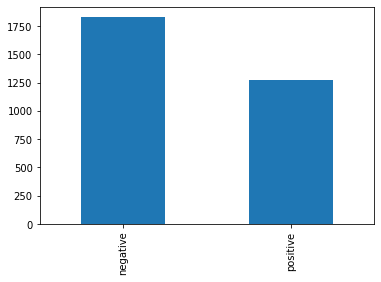

In [ ]:
label_bar_chart = dataset_label['polarity'].value_counts()
label_bar_chart.plot(kind='bar');

In [ ]:
dataset_label["final"] = [' '.join(map(str, l)) for l in dataset_label['stemming']]

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming,polarity_score,polarity,final
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va...",-4,negative,jenis vaksin sesuai stok bagus tulis vaksin as...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st...",4,positive,sinovac sinopharm astrazeneca eua who standar ...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca...",2,positive,sesal deh vaksin gue sinovac astrazeneca efektif
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad...","[vaksin, astrazeneca, sebab, infeksi, adenovir...",-5,negative,vaksin astrazeneca sebab infeksi adenovirus co...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,...","[dnj, desember, indonesia, aman, dosis, vaksin...",4,positive,dnj desember indonesia aman dosis vaksin covid...
...,...,...,...,...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[duga, picu, mati, efek, kipi, vaksin, astraze...",1,positive,duga picu mati efek kipi vaksin astrazeneca ke...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j...","[indonesia, datang, vaksin, astrazeneca, juta,...",-2,negative,indonesia datang vaksin astrazeneca juta dosis
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks...","[kamis, malam, juni, indonesia, terima, vaksin...",-3,negative,kamis malam juni indonesia terima vaksin astra...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, bukti, turun...",-6,negative,good news vaksin astrazeneca bukti turun risik...


<h4> encode label

In [ ]:
polarity_encode = {'negative' : 1, 'positive' : 0}
dataset_label['new_polarity'] = dataset_label['polarity'].map(polarity_encode).values


<IPython.core.display.Javascript object>

In [ ]:
dataset_label.to_csv('hasil_labeling_otomatis.csv', sep=',', index=False)

<IPython.core.display.Javascript object>

##Wordcloud

In [ ]:
negative_label = dataset_label[dataset_label['polarity']=='negative']

In [ ]:
negative_label = negative_label['final']

In [ ]:
positive_label = dataset_label[dataset_label['polarity']=='positive']

In [ ]:
positive_label = positive_label['final']

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


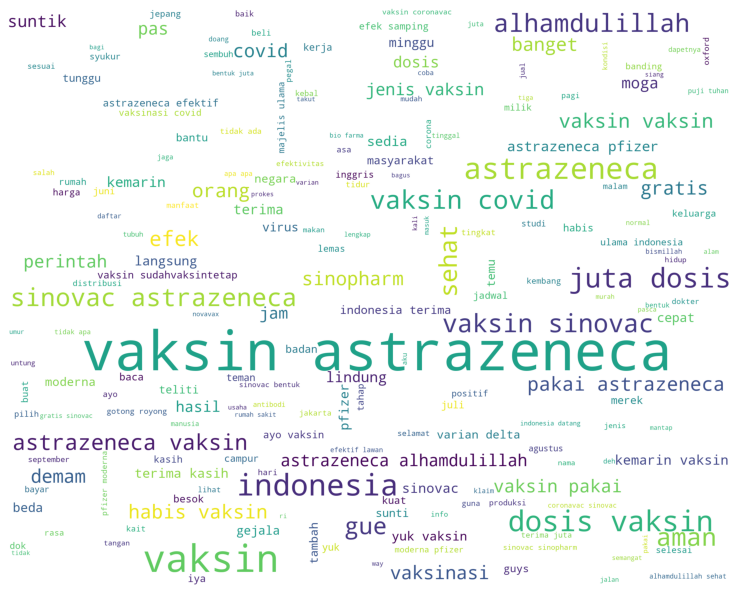

Negative words


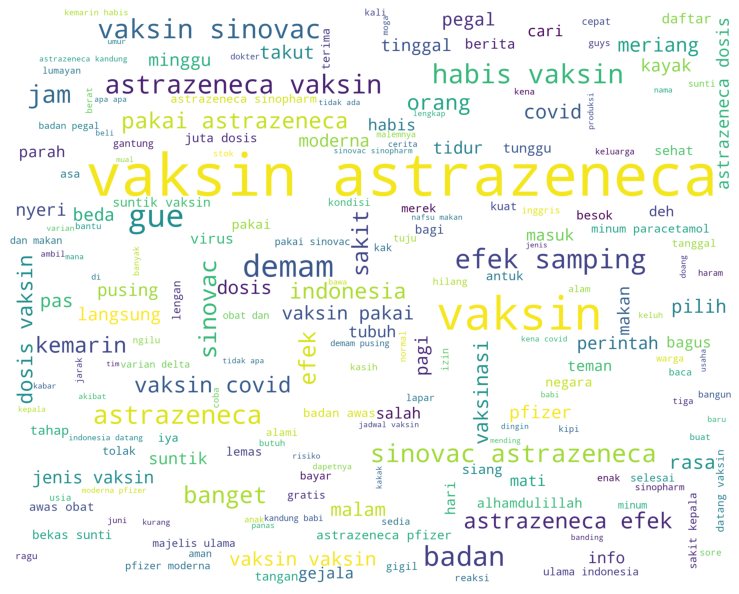

In [ ]:
print("Positive words")
wordcloud_draw(positive_label,'white')
print("Negative words")
wordcloud_draw(negative_label, 'white')

## Train Test Split

In [ ]:
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

<IPython.core.display.Javascript object>

<h4> train, test, split

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset_label['final'], dataset_label['new_polarity'], test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

<IPython.core.display.Javascript object>

In [ ]:
df_train80 = pd.DataFrame()
df_train80['final'] = train_X
df_train80['label'] = train_Y

df_test20 = pd.DataFrame()
df_test20['final'] = test_X
df_test20['label'] = test_Y

<IPython.core.display.Javascript object>

In [ ]:
df_test20

<IPython.core.display.Javascript object>

,final,label
2554,info ikut agustus rsud sleman layan khusus ast...,1
253,vaksin astrazeneca kantong izin guna darurat e...,1
1651,alhamdulillah kipi habis vaksin pakai astrazen...,0
791,sinovac efek samping asa efek lumayan berat va...,1
570,pakai vaksin om bulan beta emosi kupang vaksin...,1
...,...,...
2180,berita sonora indonesia datang vaksin covid ju...,1
2420,cepat vaksinasi indonesia terima juta dosis va...,0
14,vaksin baik vaksin dapat pilih pilih vaksin va...,1
2799,perintah hitung sedia vaksin astrazeneca dosis,0


In [ ]:
df_train80

<IPython.core.display.Javascript object>

,final,label
1742,efek vaksin astrazeneca pas malam demam,0
2249,pas vaksin reaksi antuk bekas suntik hari tidu...,1
2288,guys vaksin astrazeneca jarak dosis dosis,0
1235,vaksin pakai astrazeneca pakai sinovac aman guys,0
326,proses buat vaksin astrazeneca tripsin hewan b...,0
...,...,...
763,maret pakai comirnaty biontech pfizer spikevax...,0
835,juta vaksin astrazeneca indonesia perintah tar...,0
1653,alhamdulillah jam pegal lengan suntik ayo tida...,0
2607,vaksin astrazeneca keras teman gue demam munta...,1


## Ekstraksi Fitur : TF-IDF

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_8020 = TfidfVectorizer(max_features = 5000)
tfidf_vect_8020.fit(dataset_label['final'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['final'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['final'])

<IPython.core.display.Javascript object>

<h4> Jumlah term unik

In [ ]:
print("Jumlah term unik = ", len(tfidf_vect_8020.get_feature_names()))
print(tfidf_vect_8020.get_feature_names())

<IPython.core.display.Javascript object>

Jumlah term unik =  3643
['abal', 'abang', 'abc', 'abdala', 'abdul', 'abnormal', 'acak', 'acara', 'aceh', 'aceng', 'acu', 'ada', 'adaptasi', 'adeku', 'adem', 'adeno', 'adenov', 'adenovirus', 'adi', 'adik', 'adil', 'adisutjipto', 'adji', 'admin', 'administrasi', 'adu', 'aduh', 'adv', 'afiat', 'afiliasi', 'agam', 'agama', 'agency', 'agenda', 'agresif', 'agung', 'agus', 'agustus', 'ah', 'ahad', 'ahli', 'air', 'aja', 'ajaib', 'ajak', 'ajal', 'ajar', 'aka', 'akal', 'akan', 'akhir', 'akibat', 'akselerasi', 'aksen', 'akses', 'aksi', 'aktif', 'aktivasi', 'aktivis', 'aktivitas', 'aktual', 'aku', 'akun', 'akurat', 'al', 'alam', 'alami', 'alamin', 'alas', 'alat', 'alergi', 'alhamdulillah', 'alhamdulilllah', 'alhasil', 'aliansi', 'alias', 'alih', 'alir', 'all', 'allah', 'almarhum', 'almet', 'alodokter', 'alokasi', 'alpa', 'alpalast', 'alpha', 'alu', 'alumni', 'alur', 'am', 'ama', 'amal', 'aman', 'amanatul', 'amat', 'amazing', 'ambang', 'ambil', 'ambisius', 'ambruk', 'amburadul', 'america', 'amerik

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vect_8020

<IPython.core.display.Javascript object>

TfidfVectorizer(max_features=5000)

In [ ]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

<IPython.core.display.Javascript object>

(2484, 3643)
(621, 3643)


## Klasifikasi SVM

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_8020,train_Y)


<IPython.core.display.Javascript object>

SVC(kernel='linear')

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_8020 = model.predict(test_X_tfidf_8020)
test_prediction_8020 = pd.DataFrame()
test_prediction_8020['final'] = test_X
test_prediction_8020['label'] = predictions_SVM_8020
SVM_accuracy_8020 = accuracy_score(predictions_SVM_8020, test_Y)*100
SVM_accuracy_8020 = round(SVM_accuracy_8020,1)

<IPython.core.display.Javascript object>

In [ ]:
SVM_accuracy_8020

<IPython.core.display.Javascript object>

87.3

In [ ]:
test_prediction_8020

<IPython.core.display.Javascript object>

,final,label
2554,info ikut agustus rsud sleman layan khusus ast...,1
253,vaksin astrazeneca kantong izin guna darurat e...,1
1651,alhamdulillah kipi habis vaksin pakai astrazen...,0
791,sinovac efek samping asa efek lumayan berat va...,1
570,pakai vaksin om bulan beta emosi kupang vaksin...,1
...,...,...
2180,berita sonora indonesia datang vaksin covid ju...,0
2420,cepat vaksinasi indonesia terima juta dosis va...,0
14,vaksin baik vaksin dapat pilih pilih vaksin va...,1
2799,perintah hitung sedia vaksin astrazeneca dosis,0


<IPython.core.display.Javascript object>

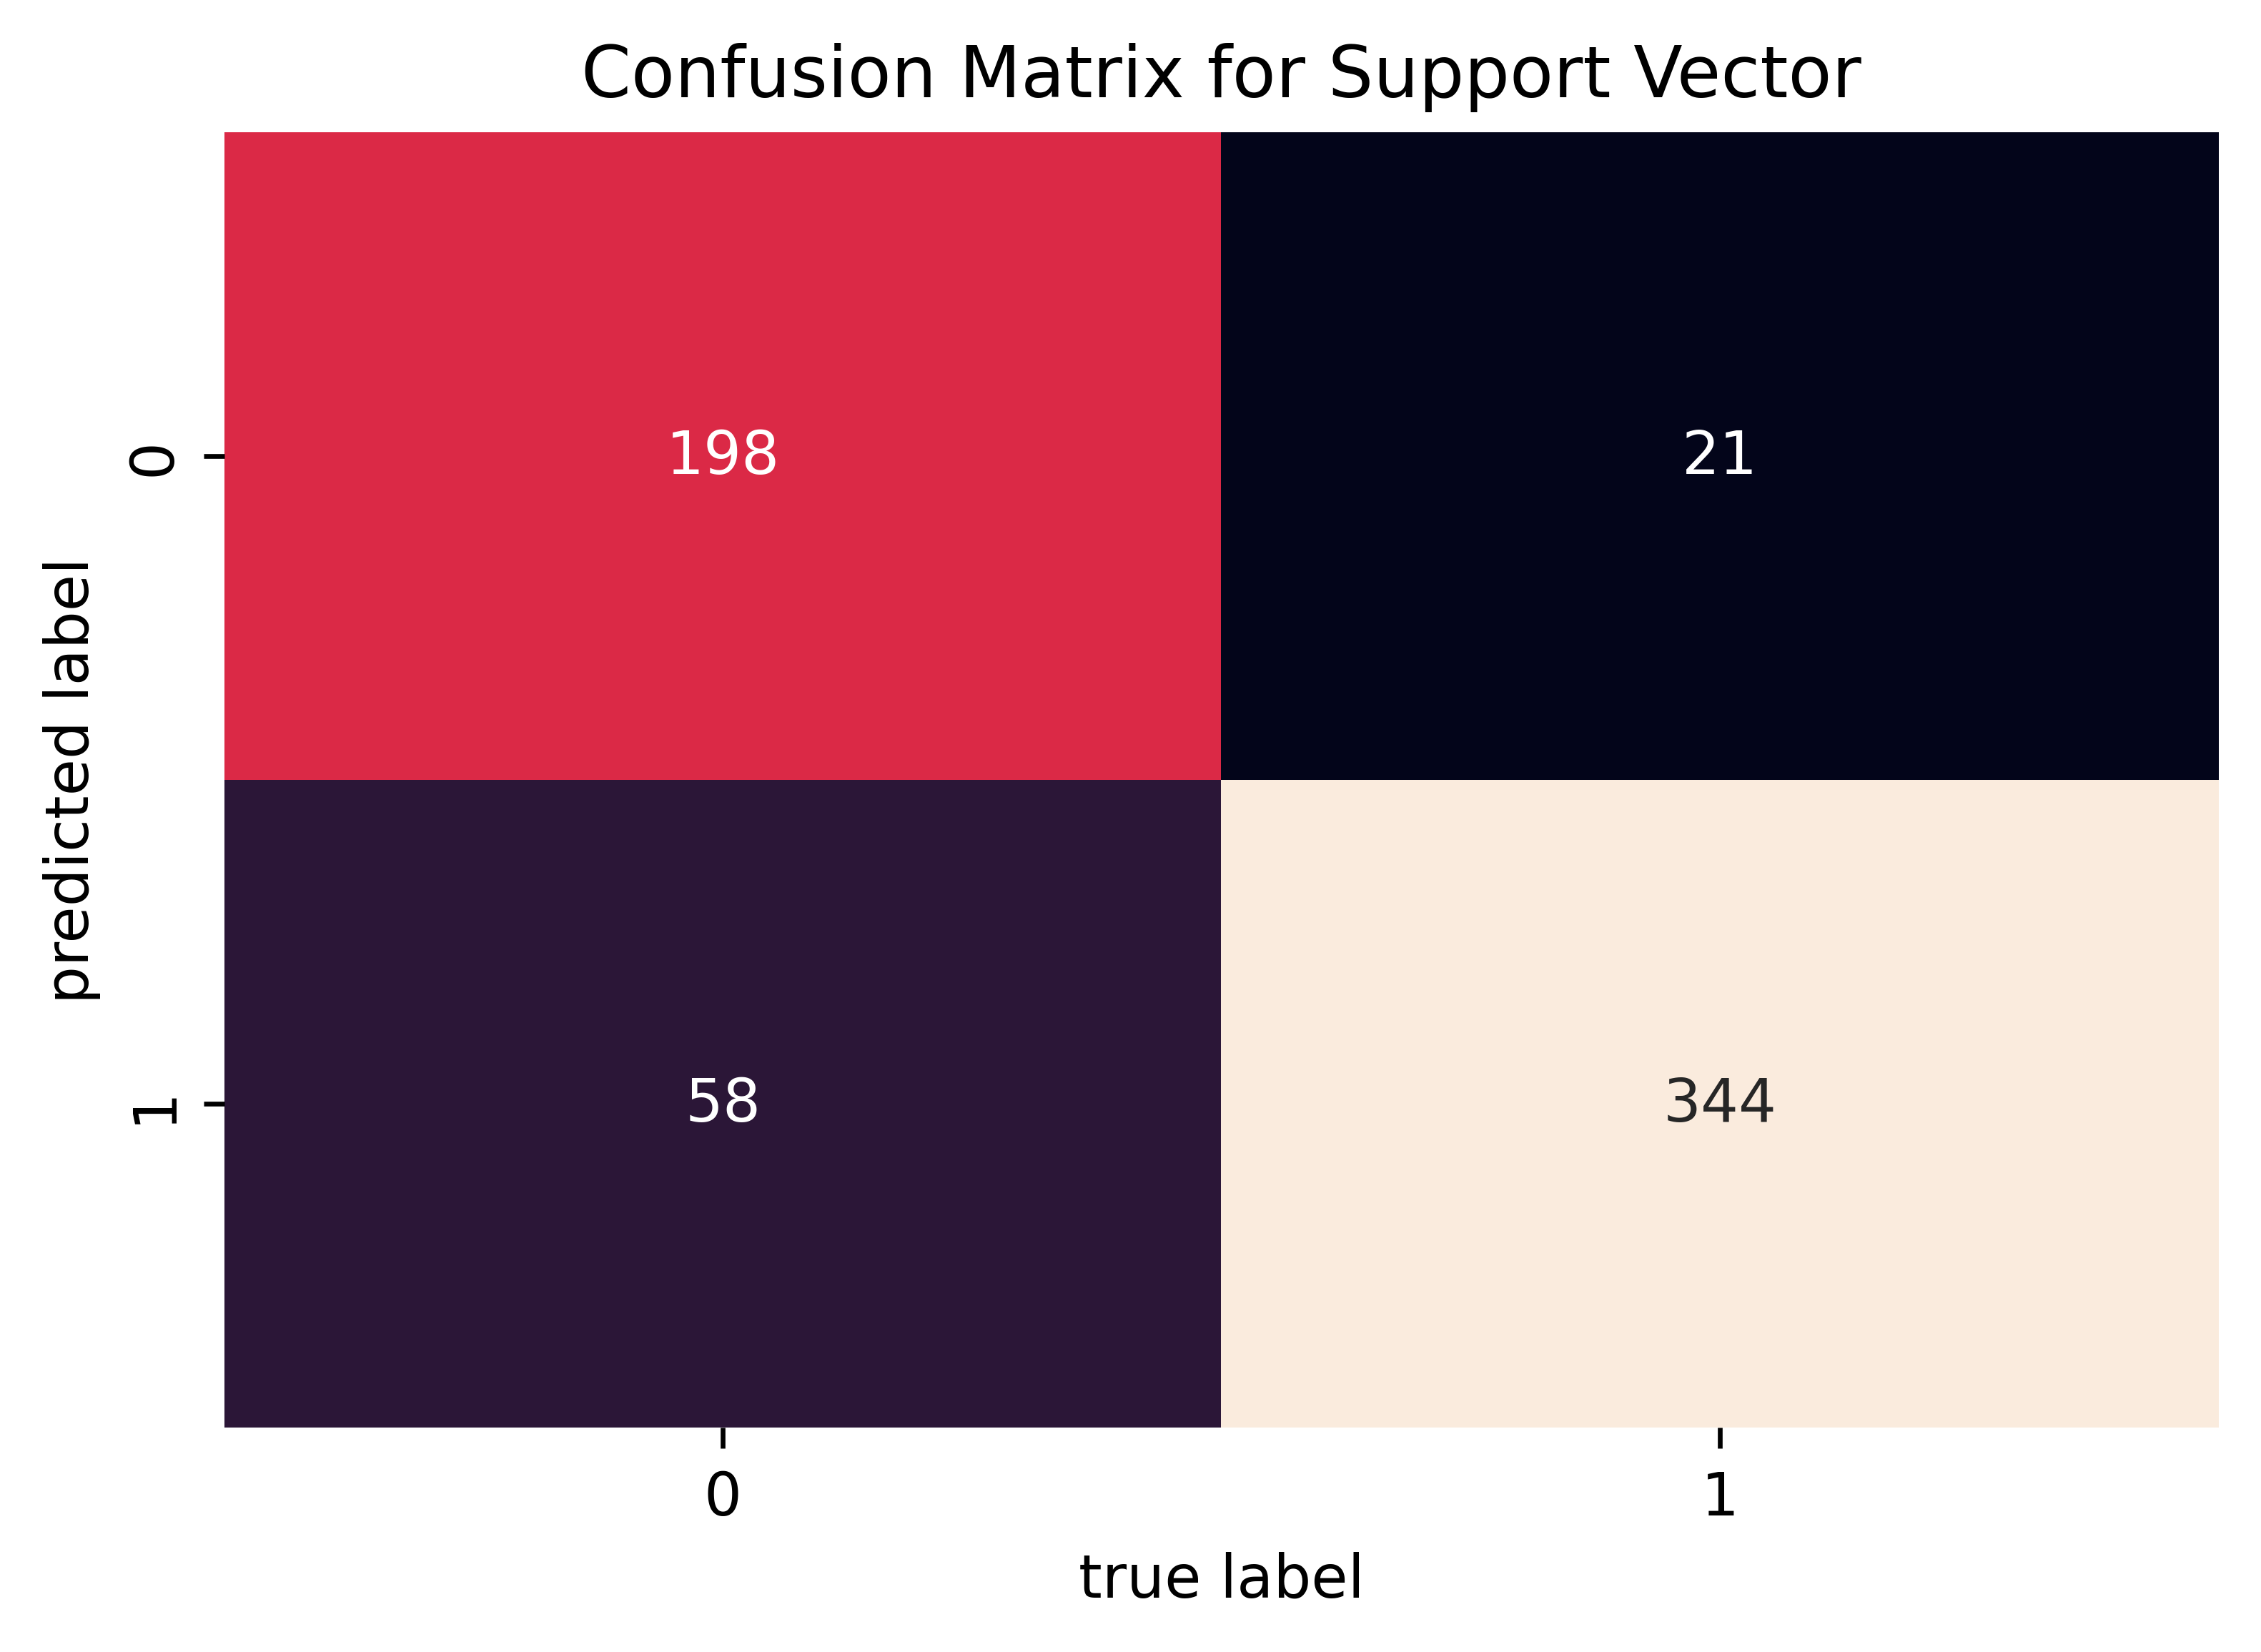

In [ ]:
plt.figure(dpi=600)
mat = confusion_matrix(test_Y, predictions_SVM_8020)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)


plt.title('Confusion Matrix for Support Vector')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

## Classfication Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, predictions_SVM_8020))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       256
           1       0.86      0.94      0.90       365

    accuracy                           0.87       621
   macro avg       0.88      0.86      0.87       621
weighted avg       0.88      0.87      0.87       621



In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_Y, predictions_SVM_8020)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

<IPython.core.display.Javascript object>

ROC AUC : 0.8580


In [ ]:
df_test20["prediction"] = test_prediction_8020['label']

<IPython.core.display.Javascript object>

In [ ]:
df_test20

<IPython.core.display.Javascript object>

,final,label,prediction
2554,info ikut agustus rsud sleman layan khusus ast...,1,1
253,vaksin astrazeneca kantong izin guna darurat e...,1,1
1651,alhamdulillah kipi habis vaksin pakai astrazen...,0,0
791,sinovac efek samping asa efek lumayan berat va...,1,1
570,pakai vaksin om bulan beta emosi kupang vaksin...,1,1
...,...,...,...
2180,berita sonora indonesia datang vaksin covid ju...,1,0
2420,cepat vaksinasi indonesia terima juta dosis va...,0,0
14,vaksin baik vaksin dapat pilih pilih vaksin va...,1,1
2799,perintah hitung sedia vaksin astrazeneca dosis,0,0


In [ ]:
# Export dataframe into a CSV
df_test20.to_csv('svm_predicitiontest.csv', sep=',', index=False)

## K-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_X_tfidf_8020,train_Y, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


<IPython.core.display.Javascript object>

Cross-validation scores:[0.82329317 0.86345382 0.82730924 0.84337349 0.875      0.86290323
 0.85887097 0.89919355 0.875      0.88709677]


In [ ]:
# Rata-rata akurasi dari Cross Validation
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8615
